In [38]:
import pandas as pd
from Functions import *
from Telescope import *
import Ariel

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [39]:
target_list = Ariel.getInstrument("Visphot").target_list


target_list["SNR param"] = target_list.apply(lambda x: "TSM" if x["Preferred Method"] == "Transit" else "ESM", 
                                                 axis=1)
for i in range(1,4):
    target_list[f"Tier {i} Observations Edwards"] = target_list[f"Tier {i} Observations"]
    target_list.drop(f"Tier {i} Observations", axis=1, inplace=True)
    

target_list.head(3)



,Star Name,Star Mass [Ms],Star Mass Error Lower [Ms],Star Mass Error Upper [Ms],Star Temperature [K],Star Temperature Error Lower [K],Star Temperature Error Upper [K],Star Radius [Rs],Star Radius Error Lower [Rs],Star Radius Error Upper [Rs],...,Tier 3 Eclipses,Preferred Method,FGS1_Flag,FGS2_Flag,FGS_Flag,Max Tier,SNR param,Tier 1 Observations Edwards,Tier 2 Observations Edwards,Tier 3 Observations Edwards
0,TOI-5704,0.73,-0.08,0.08,4590.0,-126.0,126.0,0.76,-0.06,0.06,...,540.0,Transit,0,0,0,1,TSM,4.0,44.0,88.0
1,TOI-672,0.54,-0.02,0.02,3765.0,-65.0,65.0,0.54,-0.02,0.02,...,233.0,Transit,0,0,0,2,TSM,1.0,11.0,21.0
2,TOI-199,0.94,-0.01,0.00,5255.0,-10.0,12.0,0.82,0.00,0.00,...,56322.0,Transit,0,0,0,2,TSM,1.0,5.0,9.0


In [40]:
Ariel.findTierObservations("WASP-138b", 'tier 1', "ESM", 7)



(2.0, 9.844207434224515)

In [41]:
for i in range(1,4):
    print(f"starting tier {i}")
    target_list[[f"Tier {i} Observations Coull", f"Tier {i} SNR Coull method"]]  = target_list.apply(lambda x: pd.Series(Ariel.findTierObservations(x["Planet Name"], 
                                                                                                         i, 
                                                                                                         x["SNR param"], 
                                                                                                         7)),
                                                                    axis=1)

starting tier 1
starting tier 2
starting tier 3


In [42]:
for i in range(1,4):
    target_list[f"Tier {i} Observation num diff (Coull-Edwards)"] = target_list.apply(lambda x: x[f"Tier {i} Observations Coull"] - x[f"Tier {i} Observations Edwards"],
                                                                                      axis=1)

In [43]:
# saving target list
target_list.to_csv("Ariel_Target_List.csv", index=False)

In [44]:
target_list = pd.read_csv("Ariel_Target_List.csv")
target_list["Tier 1 SNR Coull method"].describe()

count    697.000000
mean      15.855027
std       16.700180
min        7.001415
25%        8.014846
50%        9.906102
75%       16.598044
max      175.825601
Name: Tier 1 SNR Coull method, dtype: float64

In [55]:
target_list[target_list["Tier 1 SNR Coull method"] == target_list["Tier 1 SNR Coull method"].max()]["Planet Name"]

281    KELT-9b
Name: Planet Name, dtype: object

In [45]:
esm_targets = target_list[target_list["SNR param"] == "ESM"]
tsm_targets = target_list[target_list["SNR param"] == "TSM"]

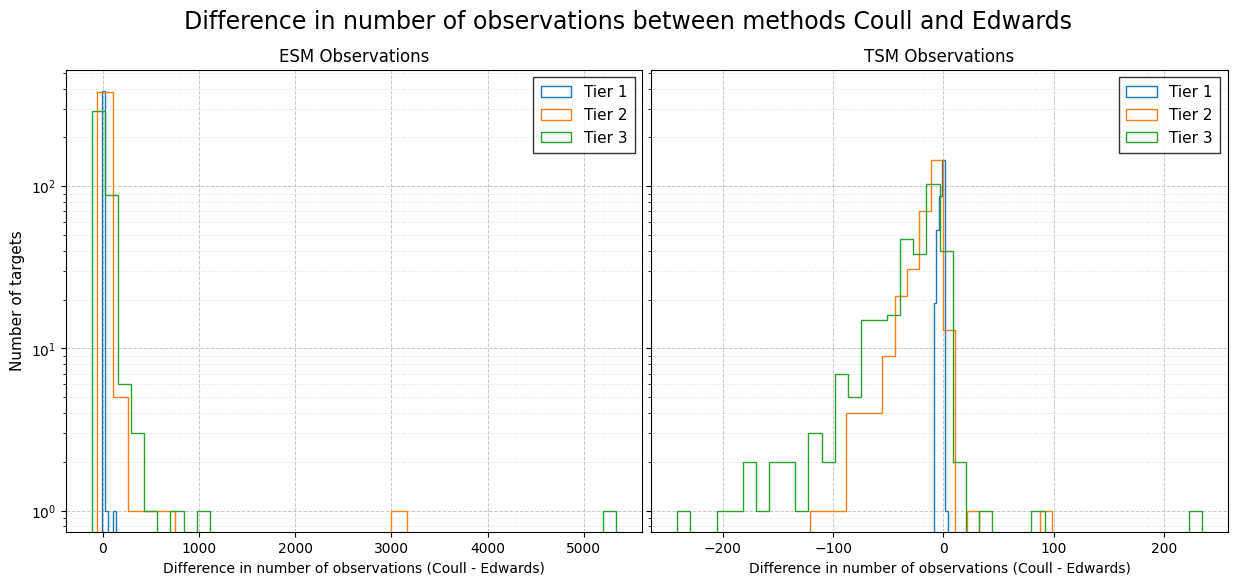

In [56]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(15,6), sharey=True) 

fig.suptitle("Difference in number of observations between methods Coull and Edwards", fontsize=17)

## AX
esm_targets.hist("Tier 1 Observation num diff (Coull-Edwards)", ax=ax, bins=5, histtype="step", label="Tier 1")
esm_targets.hist("Tier 2 Observation num diff (Coull-Edwards)", ax=ax, bins=20, histtype="step", label="Tier 2")    
esm_targets.hist("Tier 3 Observation num diff (Coull-Edwards)", ax=ax, bins=40, histtype="step", label="Tier 3")  

# scale
ax.set_yscale('log')

# grid
ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--', linewidth=.7, alpha=.7)     
ax.grid(which='minor', axis='y', linestyle='-.', linewidth=0.4, alpha=.4)     
ax.grid(which='major', axis='x', linestyle='--', linewidth=.7, alpha=.7)   

# title
ax.set_title("ESM Observations", fontsize=12)

# labels
ax.set_xlabel("Difference in number of observations (Coull - Edwards)", fontsize=10)
ax.set_ylabel("Number of targets", fontsize=11)

# legend
ax.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")


## AX1
tsm_targets.hist("Tier 1 Observation num diff (Coull-Edwards)", ax=ax1, bins=5, histtype="step", label="Tier 1")
tsm_targets.hist("Tier 2 Observation num diff (Coull-Edwards)", ax=ax1, bins=20, histtype="step", label="Tier 2")    
tsm_targets.hist("Tier 3 Observation num diff (Coull-Edwards)", ax=ax1, bins=40, histtype="step", label="Tier 3")  

# scale
ax1.set_yscale('log')

# grid
ax1.grid(False)
ax1.grid(which='major', axis='y', linestyle='--', linewidth=.7, alpha=.7)     
ax1.grid(which='minor', axis='y', linestyle='-.', linewidth=0.4, alpha=.4)     
ax1.grid(which='major', axis='x', linestyle='--', linewidth=.7, alpha=.7)   

# title
ax1.set_title("TSM Observations", fontsize=12)

# labels
ax1.set_xlabel("Difference in number of observations (Coull - Edwards)", fontsize=10)
# ax1.set_yticks([])

# legend
ax1.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")

plt.subplots_adjust(wspace=0.015, hspace=0)

plt.savefig("Results Plots/ESM_TSM_Observations_diff.png", dpi=300, bbox_inches="tight")

plt.show()

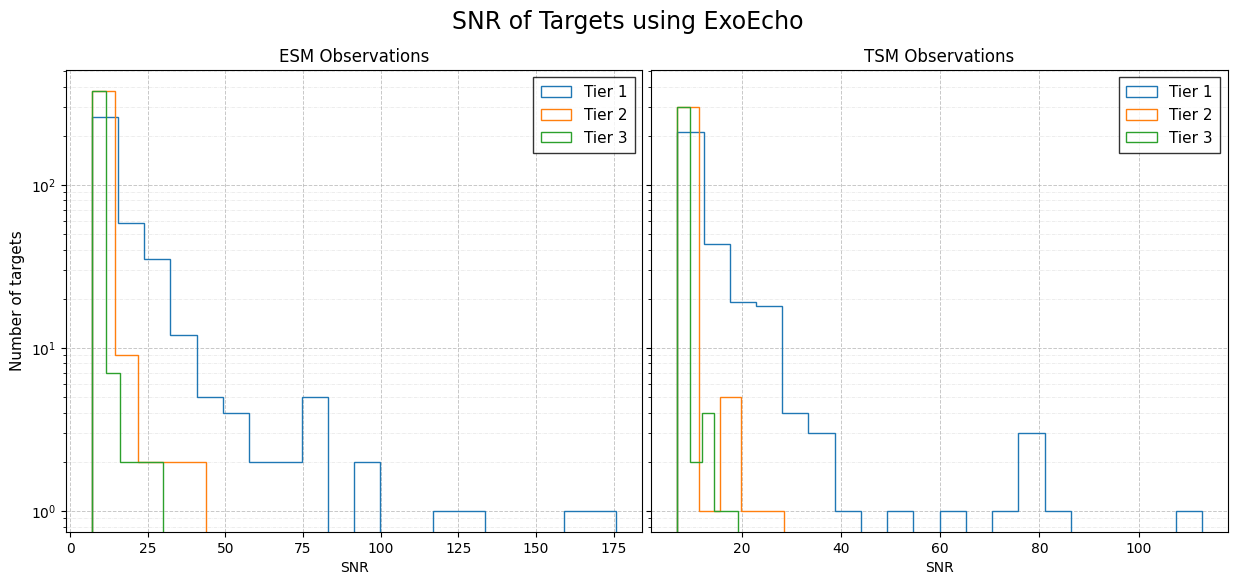

In [57]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(15,6), sharey=True) 

fig.suptitle("SNR of Targets using ExoEcho", fontsize=17)

## AX
esm_targets.hist("Tier 1 SNR Coull method", ax=ax, bins=20, histtype="step", label="Tier 1")
esm_targets.hist("Tier 2 SNR Coull method", ax=ax, bins=5, histtype="step", label="Tier 2")
esm_targets.hist("Tier 3 SNR Coull method", ax=ax, bins=5, histtype="step", label="Tier 3")

# scale
ax.set_yscale('log')

# grid
ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--', linewidth=.7, alpha=.7)     
ax.grid(which='minor', axis='y', linestyle='-.', linewidth=0.4, alpha=.4)     
ax.grid(which='major', axis='x', linestyle='--', linewidth=.7, alpha=.7)   

# title
ax.set_title("ESM Observations", fontsize=12)

# labels
ax.set_xlabel("SNR", fontsize=10)
ax.set_ylabel("Number of targets", fontsize=11)

# legend
ax.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")


## AX1
tsm_targets.hist("Tier 1 SNR Coull method", ax=ax1, bins=20, histtype="step", label="Tier 1")
tsm_targets.hist("Tier 2 SNR Coull method", ax=ax1, bins=5, histtype="step", label="Tier 2")    
tsm_targets.hist("Tier 3 SNR Coull method", ax=ax1, bins=5, histtype="step", label="Tier 3")  

# scale
ax1.set_yscale('log')

# grid
ax1.grid(False)
ax1.grid(which='major', axis='y', linestyle='--', linewidth=.7, alpha=.7)     
ax1.grid(which='minor', axis='y', linestyle='-.', linewidth=0.4, alpha=.4)     
ax1.grid(which='major', axis='x', linestyle='--', linewidth=.7, alpha=.7)   

# title
ax1.set_title("TSM Observations", fontsize=12)

# labels
ax1.set_xlabel("SNR", fontsize=10)
# ax1.set_yticks([])

# legend
ax1.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")

plt.subplots_adjust(wspace=0.015, hspace=0)

plt.savefig("Results Plots/ESM_TSM_SNR.png", dpi=300, bbox_inches="tight")

plt.show()

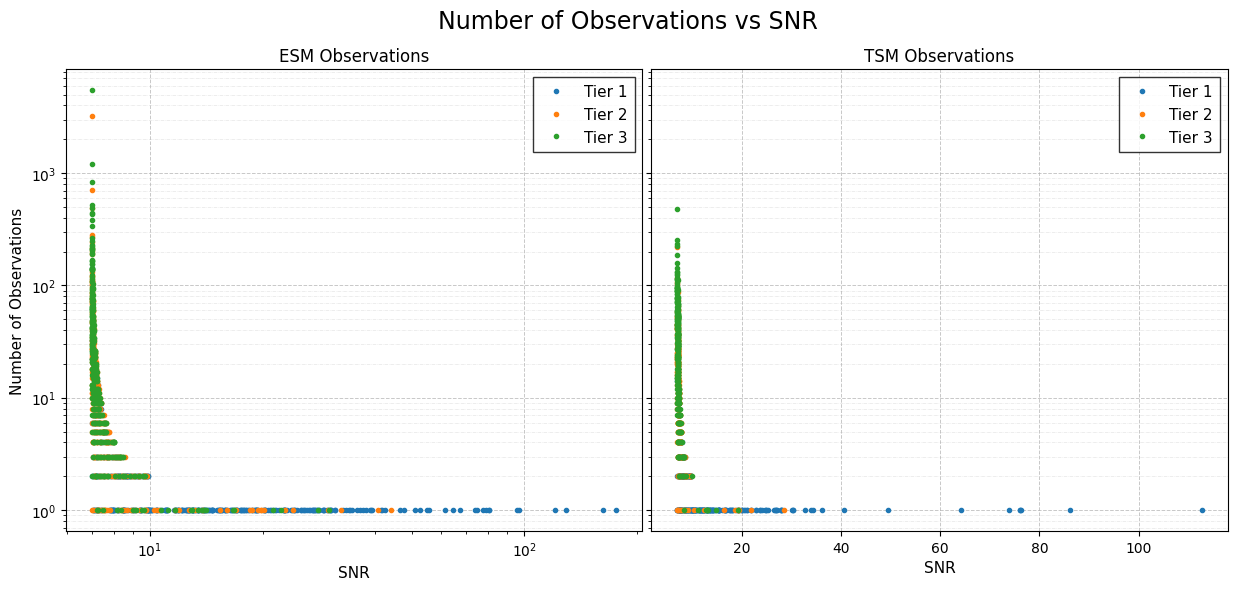

In [58]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(15,6), sharey=True) 

fig.suptitle("Number of Observations vs SNR", fontsize=17)

## AX
esm_targets.plot("Tier 1 SNR Coull method", "Tier 1 Observations Coull", linestyle='', marker='.', ax=ax, label="Tier 1")
esm_targets.plot("Tier 2 SNR Coull method", "Tier 2 Observations Coull", linestyle='', marker='.', ax=ax, label="Tier 2")
esm_targets.plot("Tier 3 SNR Coull method", "Tier 3 Observations Coull", linestyle='', marker='.', ax=ax, label="Tier 3")

# scale
ax.set_yscale('log')
ax.set_xscale('log')

# grid
ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--', linewidth=.7, alpha=.7)     
ax.grid(which='minor', axis='y', linestyle='-.', linewidth=0.4, alpha=.4)     
ax.grid(which='major', axis='x', linestyle='--', linewidth=.7, alpha=.7)   

# title
ax.set_title("ESM Observations", fontsize=12)

# labels
ax.set_xlabel("SNR", fontsize=11)
ax.set_ylabel("Number of Observations", fontsize=11)

# legend
ax.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")


## AX1
tsm_targets.plot("Tier 1 SNR Coull method", "Tier 1 Observations Coull", linestyle='', marker='.', ax=ax1, label="Tier 1")
tsm_targets.plot("Tier 2 SNR Coull method", "Tier 2 Observations Coull", linestyle='', marker='.', ax=ax1, label="Tier 2")    
tsm_targets.plot("Tier 3 SNR Coull method", "Tier 3 Observations Coull", linestyle='', marker='.', ax=ax1, label="Tier 3")  

# scale
# ax1.set_yscale('log')

# grid
ax1.grid(False)
ax1.grid(which='major', axis='y', linestyle='--', linewidth=.7, alpha=.7)     
ax1.grid(which='minor', axis='y', linestyle='-.', linewidth=0.4, alpha=.4)     
ax1.grid(which='major', axis='x', linestyle='--', linewidth=.7, alpha=.7)   

# title
ax1.set_title("TSM Observations", fontsize=12)

# labels
ax1.set_xlabel("SNR", fontsize=11)
# ax1.set_yticks([])

# legend
ax1.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")

plt.subplots_adjust(wspace=0.015, hspace=0)

plt.savefig("Results Plots/ESM_TSM_Observations_SNR.png", dpi=300, bbox_inches="tight")

plt.show()

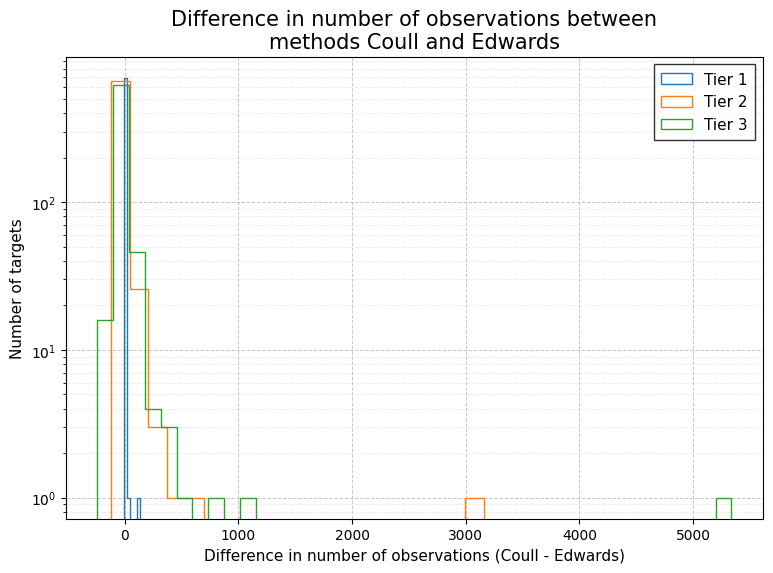

In [49]:
fig, ax = plt.subplots(figsize=(9,6)) 


target_list.hist("Tier 1 Observation num diff (Coull-Edwards)", ax=ax, bins=5, histtype="step", label="Tier 1")
target_list.hist("Tier 2 Observation num diff (Coull-Edwards)", ax=ax, bins=20, histtype="step", label="Tier 2")    
target_list.hist("Tier 3 Observation num diff (Coull-Edwards)", ax=ax, bins=40, histtype="step", label="Tier 3")  

# scale
ax.set_yscale('log')

# grid
ax.grid(False)
ax.grid(which='major', axis='y', linestyle='--', linewidth=.7, alpha=.7)     
ax.grid(which='minor', axis='y', linestyle='-.', linewidth=0.4, alpha=.4)     
ax.grid(which='major', axis='x', linestyle='--', linewidth=.7, alpha=.7)   

# title
ax.set_title("Difference in number of observations between\nmethods Coull and Edwards", fontsize=15)

# labels
ax.set_xlabel("Difference in number of observations (Coull - Edwards)", fontsize=11)
ax.set_ylabel("Number of targets", fontsize=11)

# legend
ax.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")

plt.show()

In [50]:
## Ranking targets by exposure time (i.e., event duration)

sorted_targets = target_list.sort_values("Transit Duration [hrs]", ascending=True)
sorted_esm = sorted_targets[sorted_targets["SNR param"] == "ESM"]
sorted_tsm = sorted_targets[sorted_targets["SNR param"] == "TSM"]

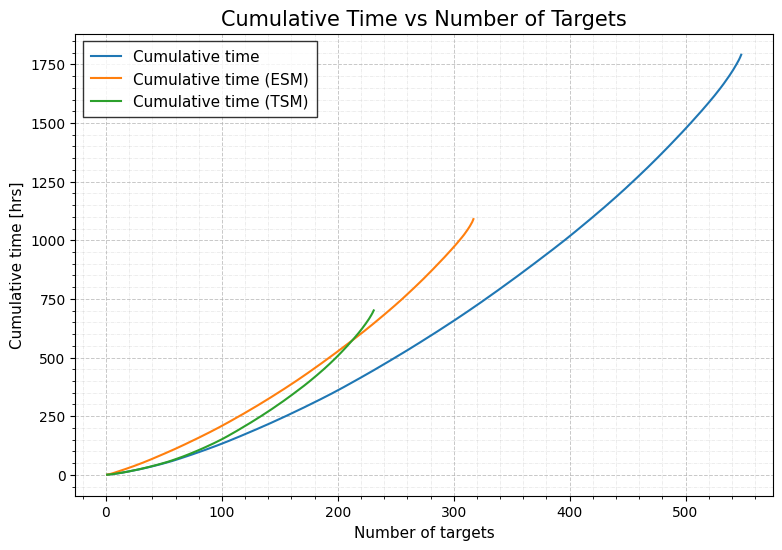

In [59]:
# plotting sorted_targets in cumulative time vs number of targets

fig, ax = plt.subplots(figsize=(9,6))

# plotting
plot = ax.plot(range(1, len(sorted_targets)+1), sorted_targets["Transit Duration [hrs]"].cumsum(), label="Cumulative time")
ax.plot(range(1, len(sorted_esm)+1), sorted_esm["Transit Duration [hrs]"].cumsum(), label="Cumulative time (ESM)")
ax.plot(range(1, len(sorted_tsm)+1), sorted_tsm["Transit Duration [hrs]"].cumsum(), label="Cumulative time (TSM)")

# grid
ax.grid(which='major', linestyle='--', linewidth=.7, alpha=.7)
ax.grid(which='minor', linestyle='-.', linewidth=0.4, alpha=.4)
ax.minorticks_on()

# labels
ax.set_xlabel("Number of targets", fontsize=11)
ax.set_ylabel("Cumulative time [hrs]", fontsize=11)

# title
ax.set_title("Cumulative Time vs Number of Targets", fontsize=15)

# legend
ax.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")

plt.savefig("Results Plots/Cumulative_Time_vs_Targets.png", dpi=300, bbox_inches="tight")

plt.show()


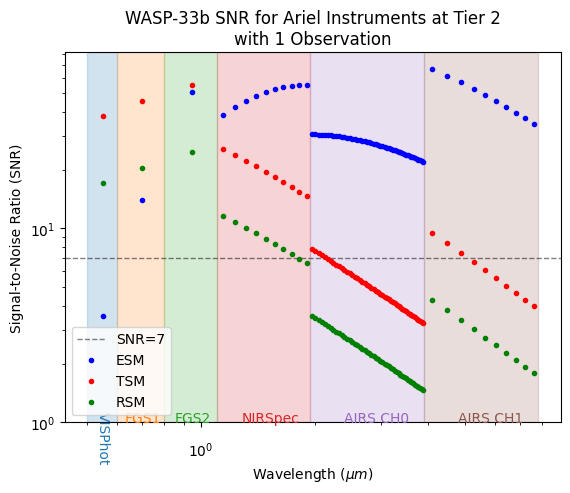

In [4]:
Ariel.plotSNRProfile('WASP-33b', 'tier 2', iterations=1)
plt.show()

# Ariel.plotSNRProfile('WASP-33b', 'tier 2', iterations=5)
# plt.show()

In [10]:
ariel_airs30 = getTelescope("Ariel AIRS CH0 R=30")

ariel_airs30.target_list[ariel_airs30.target_list["Planet Name"] == "TRAPPIST-1b"]

,Star Name,Star Mass [Ms],Star Mass Error Lower [Ms],Star Mass Error Upper [Ms],Star Temperature [K],Star Temperature Error Lower [K],Star Temperature Error Upper [K],Star Radius [Rs],Star Radius Error Lower [Rs],Star Radius Error Upper [Rs],...,Tier 2 Eclipses,Tier 3 Eclipses,Preferred Method,Tier 1 Observations,Tier 2 Observations,Tier 3 Observations,FGS1_Flag,FGS2_Flag,FGS_Flag,Max Tier
28,TRAPPIST-1,0.09,0.0,0.0,2566.0,-26.0,26.0,0.12,0.0,0.0,...,18304.0,43386.0,Transit,1.0,10.0,19.0,1,0,1,2


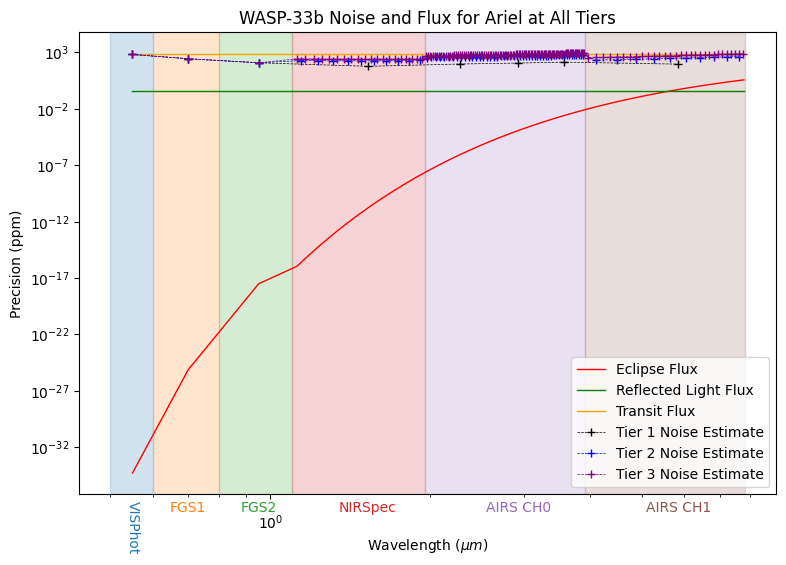

In [4]:
planet = "TRAPPIST-1e"

fig, ax[0,0] = plt.subplots(figsize=(9,6))

ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')

# Plotting 
instruments = ["VISPhot", "FGS1", "FGS2", "NIRSpec R=20", "AIRS CH0 R=100", "AIRS CH1 R=100"]
Ariel.plotParamProfile(planet, instruments, "Eclipse Flux", linestyle='-', linewidth=1, marker='', ax=ax[0,0], color='red', label='Eclipse Flux')
Ariel.plotParamProfile(planet, instruments, "Reflected Light Flux", linestyle='-', linewidth=1, marker='', ax=ax[0,0], color='green', label='Reflected Light Flux')
Ariel.plotParamProfile(planet, instruments, "Transit Flux", linestyle='-', linewidth=1, marker='', ax=ax[0,0], color='orange', label='Transit Flux')

Ariel.plotParamProfile(planet, "tier 1", "Noise Estimate", linestyle='--', linewidth=.5, marker='+', ax=ax[0,0], color='black', label='Tier 1 Noise Estimate')
Ariel.plotParamProfile(planet, "tier 2", "Noise Estimate", linestyle='--', linewidth=.5, marker='+', ax=ax[0,0], color='blue', label='Tier 2 Noise Estimate')
Ariel.plotParamProfile(planet, "tier 3", "Noise Estimate", linestyle='--', linewidth=.5, marker='+', ax=ax[0,0], color='purple', label='Tier 3 Noise Estimate')

Ariel.plotSensitivityRange(ax=ax[0,0])

# legend
ax[0,0].legend(loc='best')

# title
ax[0,0].set_title("WASP-33b Noise and Flux for Ariel at All Tiers")

# labels
ax[0,0].set_xlabel("Wavelength ($\mu m$)")
ax[0,0].set_ylabel("Precision (ppm)")

# setting x-tick label padding
ax[0,0].tick_params(axis='x', pad=10)

# plt.savefig()

plt.show()

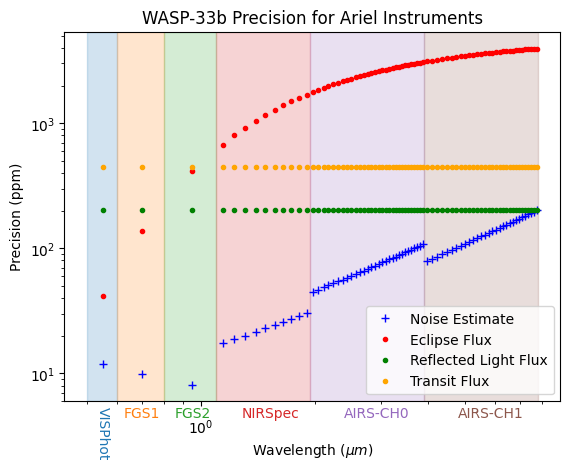

In [ ]:
planet = "WASP-33b"

fig, ax[0,0] = plt.subplots()

ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')

instruments = ["VISPhot", "FGS1", "FGS2", "NIRSpec R=10", "AIRS-CH0 R=30", "AIRS-CH1 R=30"]

Ariel.plotParamProfile(instruments, 
                       planet, "Noise Estimate", ax=ax[0,0], color='b', marker='+', linestyle='')

Ariel.plotParamProfile(instruments, 
                       planet, "Eclipse Flux", ax=ax[0,0], color='r', linestyle='')

Ariel.plotParamProfile(instruments, 
                       planet, "Reflected Light Flux", ax=ax[0,0], color='g', linestyle='')

Ariel.plotParamProfile(instruments, 
                       planet, "Transit Flux", ax=ax[0,0], color='orange', linestyle='')



# Ariel.plotParamProfile(["VISPhot", "FGS1", "FGS2", "NIRSpec", "AIRS-CH0 R=30", "AIRS-CH1 R=30"], 
#                        planet, "ESM", ax=ax, color='b', marker='.')

# Ariel.plotParamProfile(["VISPhot", "FGS1", "FGS2", "NIRSpec", "AIRS-CH0 R=30", "AIRS-CH1 R=30"],
#                         planet, "RSM", ax=ax, marker='.', color='r')

Ariel.plotSensitivityRange(instruments, 
                           fig=fig, ax=ax[0,0])

ax[0,0].tick_params(axis='x', pad=8)

# setting title
title = f"{planet} Precision for Ariel Instruments"
ax[0,0].set_title(title)

# ax.legend(loc=(1.02, 0.3))
ax[0,0].legend(loc='best')


ax[0,0].set_xlabel("Wavelength ($\mu m$)")
# ax.set_ylabel("Signal-to-noise ratio (SNR)")
ax[0,0].set_ylabel("Precision (ppm)")

plt.savefig("Precision plots/" + title, bbox_inches='tight', dpi=300)

plt.show()

In [ ]:
# test import

ArielNirspec_imported = getTelescope("Ariel Nirspec")

ArielNirspec_imported.table[ArielNirspec_imported.table["Planet Name"] == "WASP-33b"]

,Planet Name,Eclipse Flux Ratio 1.1-1.1566667um,Eclipse Flux Ratio 1.1566667-1.2133333um,Eclipse Flux Ratio 1.2133333-1.27um,Eclipse Flux Ratio 1.27-1.3266667um,Eclipse Flux Ratio 1.3266667-1.3833333um,Eclipse Flux Ratio 1.3833333-1.44um,Eclipse Flux Ratio 1.44-1.4966667um,Eclipse Flux Ratio 1.4966667-1.5533333um,Eclipse Flux Ratio 1.5533333-1.61um,...,ESM Estimate 1.3833333-1.44um,ESM Estimate 1.44-1.4966667um,ESM Estimate 1.4966667-1.5533333um,ESM Estimate 1.5533333-1.61um,ESM Estimate 1.61-1.6666667um,ESM Estimate 1.6666667-1.7233333um,ESM Estimate 1.7233333-1.78um,ESM Estimate 1.78-1.8366667um,ESM Estimate 1.8366667-1.8933333um,ESM Estimate 1.8933333-1.95um
100,WASP-33b,0.000655,0.000736,0.000818,0.0009,0.000981,0.001061,0.00114,0.001218,0.001294,...,6.314156,6.405829,6.482415,6.545563,6.596745,6.637289,6.668392,6.691108,6.706385,6.715076


In [ ]:
ArielNirspec_imported.getParam('noise').head()

,Planet Name,Noise Estimate 1.1-1.1566667um,Noise Estimate 1.1566667-1.2133333um,Noise Estimate 1.2133333-1.27um,Noise Estimate 1.27-1.3266667um,Noise Estimate 1.3266667-1.3833333um,Noise Estimate 1.3833333-1.44um,Noise Estimate 1.44-1.4966667um,Noise Estimate 1.4966667-1.5533333um,Noise Estimate 1.5533333-1.61um,Noise Estimate 1.61-1.6666667um,Noise Estimate 1.6666667-1.7233333um,Noise Estimate 1.7233333-1.78um,Noise Estimate 1.78-1.8366667um,Noise Estimate 1.8366667-1.8933333um,Noise Estimate 1.8933333-1.95um
0,TOI-5704b,0.084144,0.084710,0.085308,0.085929,0.086570,0.087224,0.087889,0.088562,0.089240,0.089921,0.090604,0.091288,0.091971,0.092653,0.093332
1,TOI-672b,0.092267,0.092589,0.092972,0.093405,0.093878,0.094384,0.094917,0.095471,0.096043,0.096628,0.097225,0.097831,0.098444,0.099062,0.099683
2,TOI-199b,0.081369,0.082063,0.082774,0.083498,0.084230,0.084968,0.085709,0.086450,0.087192,0.087931,0.088668,0.089401,0.090130,0.090855,0.091574
3,WASP-176b,0.091642,0.092550,0.093468,0.094390,0.095313,0.096236,0.097156,0.098071,0.098981,0.099885,0.100782,0.101672,0.102554,0.103428,0.104293
4,TOI-1801b,0.074742,0.075037,0.075379,0.075759,0.076168,0.076603,0.077057,0.077527,0.078010,0.078503,0.079004,0.079511,0.080023,0.080539,0.081056


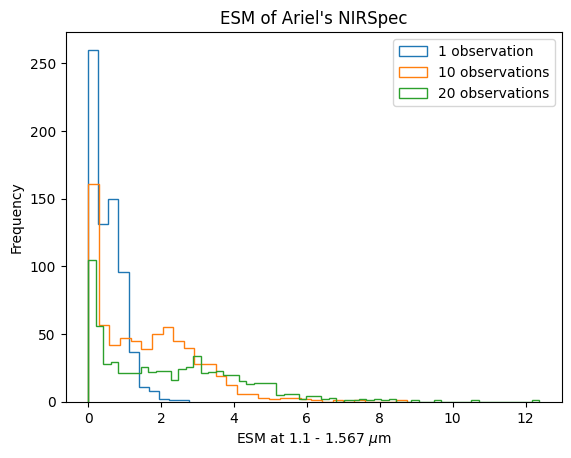

In [ ]:
iter1 = 1
iter2 = 10
iter3 = 20

esm1 = ArielNirspec_imported.getParam('esm', iterations=iter1)["ESM Estimate 1.1-1.1566667um"]
esm2 = ArielNirspec_imported.getParam('esm', iterations=iter2)["ESM Estimate 1.1-1.1566667um"]
esm3 = ArielNirspec_imported.getParam('esm', iterations=iter3)["ESM Estimate 1.1-1.1566667um"]

esm1.plot.hist(bins=10, histtype='step', label=f"{iter1} observation")
esm2.plot.hist(bins=30, histtype='step', label=f"{iter2} observations")
esm3.plot.hist(bins=60, histtype='step', label=f"{iter3} observations")
plt.legend()

plt.title("ESM of Ariel's NIRSpec")
plt.xlabel("ESM at 1.1 - 1.567 $\mu$m")

plt.show()

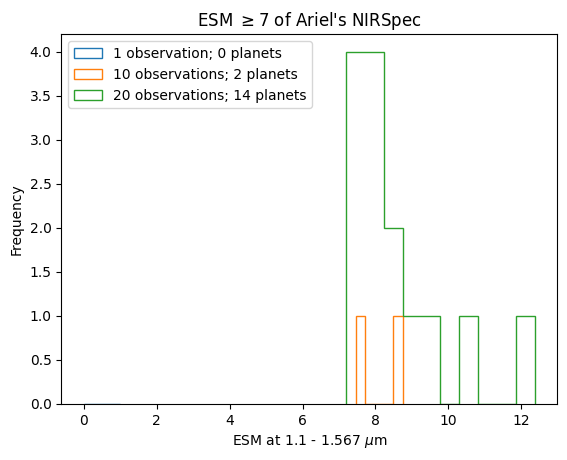

In [ ]:
iter1 = 1
iter2 = 10
iter3 = 20

num1 = esm1[esm1 >= 7].count()
num2 = esm2[esm2 >= 7].count()
num3 = esm3[esm3 >= 7].count()

esm1[esm1 >= 7].plot.hist(bins=1, histtype='step', label=f"{iter1} observation; {num1} planets")
esm2[esm2 >= 7].plot.hist(bins=5, histtype='step', label=f"{iter2} observations; {num2} planets")
esm3[esm3 >= 7].plot.hist(bins=10, histtype='step', label=f"{iter3} observations; {num3} planets")
plt.legend()

plt.title("ESM $\geq 7$ of Ariel's NIRSpec")
plt.xlabel("ESM at 1.1 - 1.567 $\mu$m")

plt.show()

In [ ]:
# "JWST/NIRSpec 0.6-1.0 um", 6.5, 0.6, 1.0, 0.30

df_known = pd.read_csv("target_lists/Ariel_MCS_Known_2024-03-27.csv")
df_tpcs = pd.read_csv("target_lists/Ariel_MCS_TPCs_2024-03-27.csv")

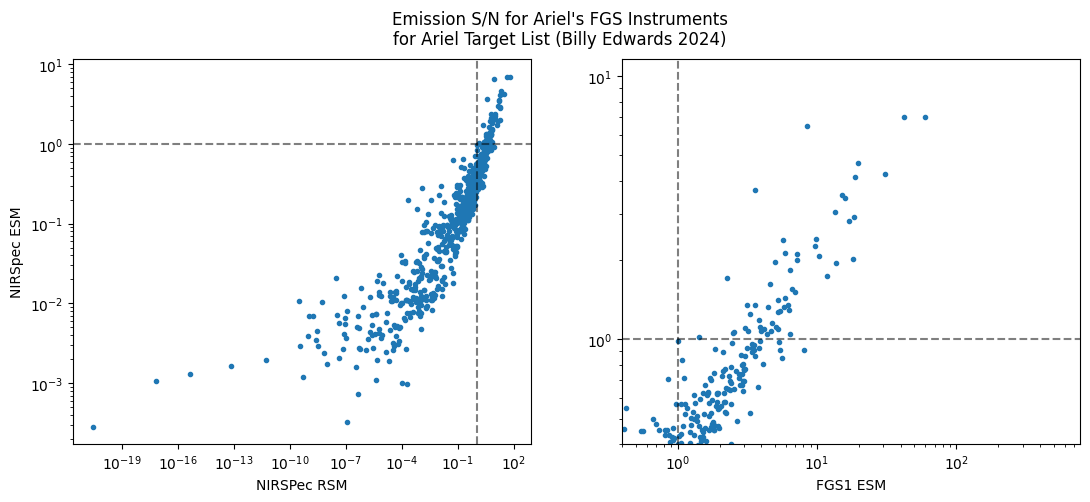

In [ ]:
# new figure for ESM
fig, (ax[0,0], ax[0,1]) = plt.subplots(1,2, figsize=(13,5))

# ax 1
ax[0,0].scatter(ArielNirspec.getESM(1.5)['ESM Estimate 1.4966667-1.5533333um'], ArielNirspec.getRSM(1.5)['RSM Estimate 1.4966667-1.5533333um'], marker='.')
ax[0,0].axhline(1, linestyle="--", color='black', alpha=.5)
ax[0,0].axvline(1, linestyle="--", color='black', alpha=.5)
ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,0].set_ylabel("NIRSpec ESM")
ax[0,0].set_xlabel("NIRSPec RSM")

# ax 2
ax[0,1].scatter(ArielNirspec.getESM(1.5)['ESM Estimate 1.4966667-1.5533333um'], ArielNirspec.getRSM(1.5)['RSM Estimate 1.4966667-1.5533333um'], marker='.')
ax[0,1].axhline(1, linestyle="--", color='black', alpha=.5)
ax[0,1].axvline(1, linestyle="--", color='black', alpha=.5)
ax[0,1].set_yscale('log')
ax[0,1].set_xscale('log')
ax[0,1].set_xlim(4e-1)
ax[0,1].set_ylim(4e-1)
ax[0,1].set_xlabel("FGS1 ESM")

# figure title
fig.suptitle("Emission S/N for Ariel's FGS Instruments\nfor Ariel Target List (Billy Edwards 2024)")

plt.show()

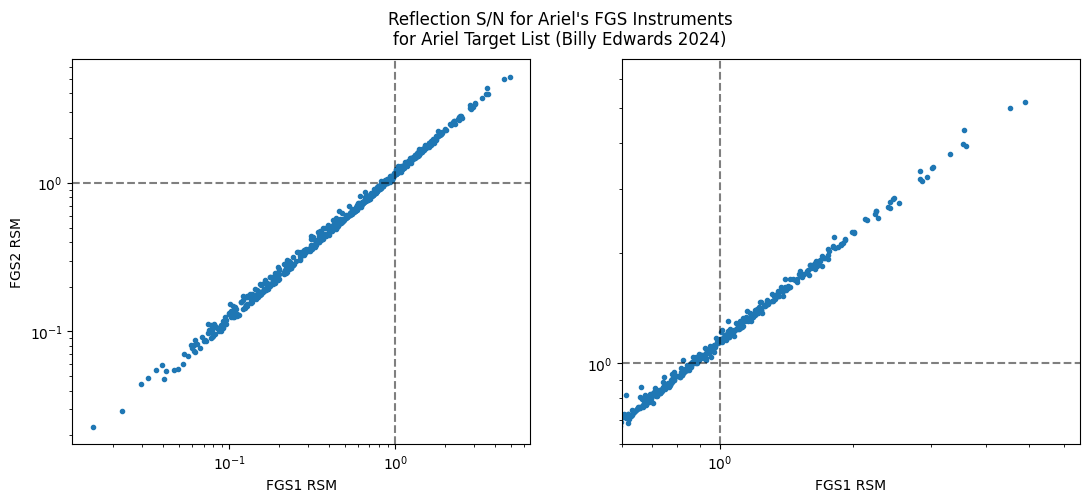

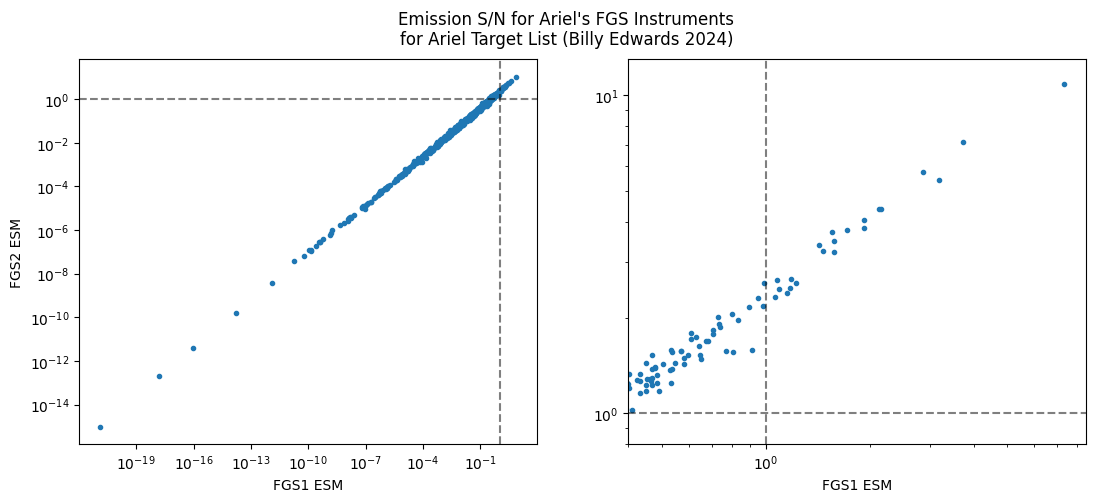

In [ ]:
fig, (ax[0,0], ax[0,1]) = plt.subplots(1,2, figsize=(13,5))

# ax 1
ax[0,0].scatter(ArielFGS1.getRSM()[ArielFGS1.getColumns("RSM")], ArielFGS2.getRSM()[ArielFGS2.getColumns("RSM")], marker='.')
ax[0,0].axhline(1, linestyle="--", color='black', alpha=.5)
ax[0,0].axvline(1, linestyle="--", color='black', alpha=.5)
ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,0].set_ylabel("FGS2 RSM")
ax[0,0].set_xlabel("FGS1 RSM")

# ax 2
ax[0,1].scatter(ArielFGS1.getRSM()[ArielFGS1.getColumns("RSM")], ArielFGS2.getRSM()[ArielFGS2.getColumns("RSM")], marker='.')
ax[0,1].axhline(1, linestyle="--", color='black', alpha=.5)
ax[0,1].axvline(1, linestyle="--", color='black', alpha=.5)
ax[0,1].set_yscale('log')
ax[0,1].set_xscale('log')
ax[0,1].set_xlim(6e-1)
ax[0,1].set_ylim(6e-1)
ax[0,1].set_xlabel("FGS1 RSM")

# figure title
fig.suptitle("Reflection S/N for Ariel's FGS Instruments\nfor Ariel Target List (Billy Edwards 2024)")

plt.show()


# new figure for ESM
fig, (ax[0,0], ax[0,1]) = plt.subplots(1,2, figsize=(13,5))

# ax 1
ax[0,0].scatter(ArielFGS1.getESM()[ArielFGS1.getColumns("ESM")], ArielFGS2.getESM()[ArielFGS2.getColumns("ESM")], marker='.')
ax[0,0].axhline(1, linestyle="--", color='black', alpha=.5)
ax[0,0].axvline(1, linestyle="--", color='black', alpha=.5)
ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,0].set_ylabel("FGS2 ESM")
ax[0,0].set_xlabel("FGS1 ESM")

# ax 2
ax[0,1].scatter(ArielFGS1.getESM()[ArielFGS1.getColumns("ESM")], ArielFGS2.getESM()[ArielFGS2.getColumns("ESM")], marker='.')
ax[0,1].axhline(1, linestyle="--", color='black', alpha=.5)
ax[0,1].axvline(1, linestyle="--", color='black', alpha=.5)
ax[0,1].set_yscale('log')
ax[0,1].set_xscale('log')
ax[0,1].set_xlim(4e-1, 8.5)
ax[0,1].set_ylim(8e-1, 13)
ax[0,1].set_xlabel("FGS1 ESM")

# figure title
fig.suptitle("Emission S/N for Ariel's FGS Instruments\nfor Ariel Target List (Billy Edwards 2024)")

plt.show()

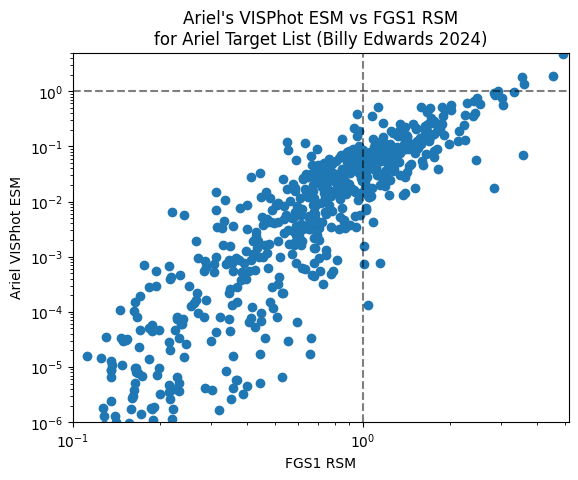

In [ ]:
fig, ax[0,0] = plt.subplots()

ax[0,0].scatter(ArielFGS1.getRSM()[ArielFGS1.getColumns("RSM")], ArielVISPhot.getESM()[ArielVISPhot.getColumns("ESM")])

ax[0,0].axhline(1, linestyle="--", color='black', alpha=.5)
ax[0,0].axvline(1, linestyle="--", color='black', alpha=.5)

ax[0,0].set_xlim(1e-1)
ax[0,0].set_ylim(1e-6)

ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')

ax[0,0].set_ylabel("Ariel VISPhot ESM")
ax[0,0].set_xlabel("FGS1 RSM")
ax[0,0].set_title("Ariel's VISPhot ESM vs FGS1 RSM\nfor Ariel Target List (Billy Edwards 2024)")

plt.show()

In [ ]:
JWSTNIRSpec = getTelescope("JWST NIRSpec 0.6-5.3um R=100")

getEclipseFluxEstimates(JWSTNIRSpec)

In [ ]:
addTelescope(df_known, "JWST NIRCam R=1600", 6.5, (2.4, 5.0), 1600, 0.36)

In [ ]:
addTelescope(df_known, "JWST NIRSpec 0.6-5.3um R=100", 6.5, (0.6, 5.3), 100, 0.36)

In [ ]:
addTelescope(df_known, "JWST NIRSpec 0.6-5.3um R=1000", 6.5, (0.6, 5.3), 1000, 0.36)

In [ ]:
# addTelescope(df_known, "JWST NIRSpec 0.6-5.3um R=2700", 6.5, (0.6, 5.3), 2700, 0.30)

In [ ]:
addTelescope(df_known,"JWST MIRI MRS 4.9-28.8um R=1500", 6.5, (4.9, 28.8), 1500, 0.18)

In [ ]:
addTelescope(df_known, "JWST MIRI LRS 5.0-12.0um R=100", 6.5, (5, 12), 100, 0.18)

In [ ]:
addTelescope(df_known, "JWST NIRISS SOSS 0.6-2.8um R=700", 6.5, (0.6, 2.8), 700, 0.2)  # http://jwst.astro.umontreal.ca/?page_id=51#:~:text=The%20SOSS%20throughput%20is%20the,with%20respect%20to%20the%20pupil.

#FOR MORE PLOTS WITH VARIOUS FILTERS: https://jwst-docs.stsci.edu/jwst-near-infrared-imager-and-slitless-spectrograph/niriss-instrumentation/niriss-filters#gsc.tab=0

In [ ]:
addTelescope(df_known, "JWST NIRSpec G395H 2.87-5.14um R=100", 6.5, (2.87, 5.14), 100, 0.4)
# For NIRSpec G395H throughput and other: https://jwst-docs.stsci.edu/jwst-near-infrared-spectrograph/nirspec-performance#gsc.tab=0
# https://jwst-docs.stsci.edu/jwst-near-infrared-spectrograph/nirspec-instrumentation/nirspec-dispersers-and-filters#gsc.tab=0

In [ ]:
addTelescope(df_known, "Ariel VISPhot 0.5-0.6um R=1", 1, (0.5, .6), 1, 0.27)
addTelescope(df_known, "Ariel FGS1 0.6-0.8um R=1", 1, (0.6, .8), 1, 0.17)
addTelescope(df_known, "Ariel FGS2 0.8-1.1um R=1", 1, (0.8, 1.10), 1, 0.25)
addTelescope(df_known, "Ariel NIRSpec 1.1-1.95um R=15", 1, (1.10, 1.95), 15, 0.27)
addTelescope(df_known, "Ariel AIRS-CH0 1.95-3.9um R=100", 1, (1.95, 3.9), 100, 0.18)
addTelescope(df_known, "Ariel AIRS-CH1 3.9-7.8um R=100", 1, (3.9, 7.8), 100, 0.18)
addTelescope(df_known, "Ariel AIRS-CH0 1.95-3.9um R=30", 1, (1.95, 3.9), 30, 0.18)
addTelescope(df_known, "Ariel AIRS-CH1 3.9-7.8um R=30", 1, (3.9, 7.8), 30, 0.18)

# See Ariel Definition of Study Report / Red Book

In [ ]:
fig, ax[0,0] = plt.subplots()

plotNoise("Telescopes/Ariel NIRSpec 1.1-1.95um R=15.csv", "Ariel NIRSpec", ax=ax[0,0], fill_between=True)
plotNoise("Telescopes/Ariel AIRS-CH0 1.95-3.9um R=30.csv", "Ariel AIRS-CH0", ax=ax[0,0], fill_between=True)
plotNoise("Telescopes/Ariel AIRS-CH1 3.9-7.8um R=30.csv", "Ariel AIRS-CH1", ax=ax[0,0], fill_between=True)

ax[0,0].text(1.1, 0.00019, "NIRSpec")
ax[0,0].text(1.25, 0.00000, "R=15")
ax[0,0].text(2.3, 0.00039, "AIRS-CH0")
ax[0,0].text(2.7, 0.00004, "R=30")
ax[0,0].text(5.2, 0.00065, "AIRS-CH1")
ax[0,0].text(5.7, 0.0001, "R=30")

ax[0,0].set_title("Noise Estimates for Various Ariel Instruments")

fig.savefig("Noise Estimate Plots/Noise Estimates for Various Ariel Instruments (R15 and R30).png", bbox_inches='tight', dpi=300)

plt.show()

In [ ]:
fig, ax[0,0] = plt.subplots()



plotNoise("Telescopes/Ariel NIRSpec 1.1-1.95um R=15.csv", "Ariel NIRSpec", ax=ax[0,0], fill_between=True)
plotNoise("Telescopes/Ariel AIRS-CH0 1.95-3.9um R=100.csv", "Ariel AIRS-CH0", ax=ax[0,0], fill_between=True)
plotNoise("Telescopes/Ariel AIRS-CH1 3.9-7.8um R=100.csv", "Ariel AIRS-CH1", ax=ax[0,0], fill_between=True)

ax[0,0].text(1.05, 0.0002, "NIRSpec")
ax[0,0].text(1.25, -0.00003, "R=15")
ax[0,0].text(2.3, 0.00071, "AIRS-CH0")
ax[0,0].text(2.7, 0.00009, "R=100")
ax[0,0].text(5.2, 0.00118, "AIRS-CH1")
ax[0,0].text(5.7, 0.00021, "R=100")

ax[0,0].set_title("Noise Estimates for Various Ariel Instruments")

fig.savefig("Noise Estimate Plots/Noise Estimates for Various Ariel Instruments (R15 and R100).png", bbox_inches='tight', dpi=300)

plt.show()